# BIOMASS PRODUCT COMPARISON : COUNTRY SUMMARY FOR GHANA ### 

##### CODE PREPARED BY: 

##### Neha Hunka, University of Maryland 
##### Veronika Leitold, University of Maryland
##### David Minor, University of Maryland

In [21]:
packages <- c("viridis","terra", "sf", "rgeos", "geosphere","RColorBrewer","jpeg","plyr","maptools", "scales","ggplot2")
package.check <- lapply(packages, FUN = function(x) {
    if (!require(x, character.only = TRUE)) {
        install.packages(x, dependencies = TRUE)
        library(x, character.only = TRUE, quietly=TRUE)
    }
})
Sys.setenv("AWS_DEFAULT_REGION" = 'us-west-2')

Loading required package: viridis

Loading required package: viridisLite


Attaching package: ‘viridis’


The following object is masked from ‘package:scales’:

    viridis_pal




Reading layer `output' from data source 
  `/projects/my-public-bucket/Data/NASA_CMS_2023/GHANA/WDPA_WDOECM_all.gpkg' 
  using driver `GPKG'
Simple feature collection with 286 features and 32 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -3.23665 ymin: 4.7652 xmax: 1.01969 ymax: 11.08657
Geodetic CRS:  WGS 84


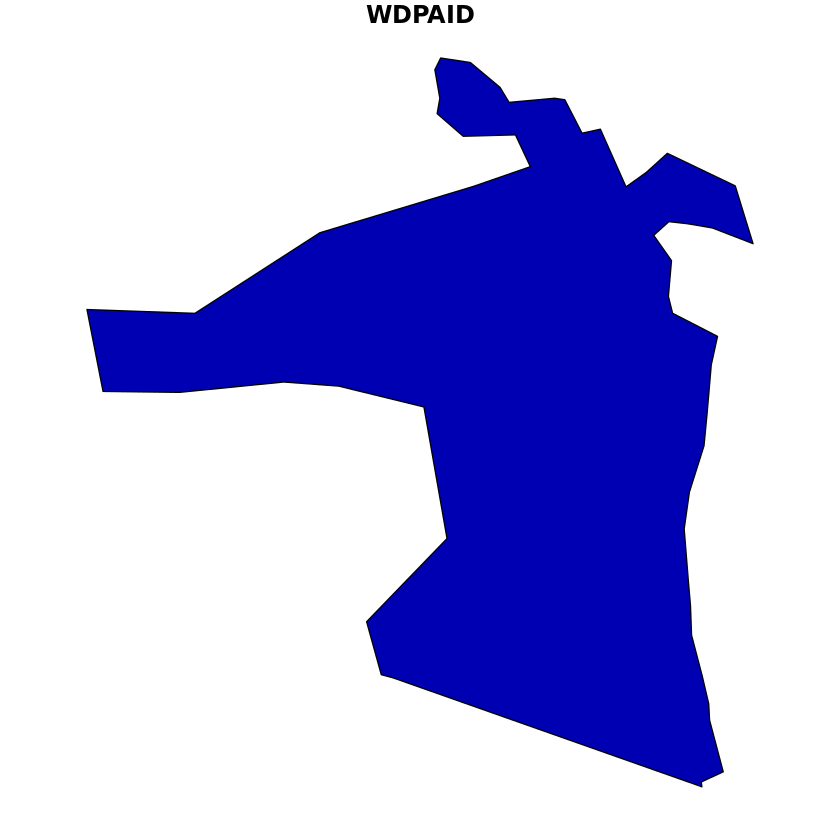

In [67]:
NPA <- st_read('/projects/my-public-bucket/Data/NASA_CMS_2023/GHANA/WDPA_WDOECM_all.gpkg')
NPA_AA <- NPA[NPA$NAME == "Assin Attandaso",]
plot(NPA_AA[,1])

In [4]:
GEDI_L2A <- read.csv('/projects/shared-buckets/leitoldv/gedi_subsetting_GHANA/DATA/GHA_L2A_filtered_M.csv')
colnames(GEDI_L2A)
GEDI_L2A <- (st_as_sf(na.omit(GEDI_L2A),coords = c(3:4),crs = st_crs(4326)))
GEDI_L2A_AA <- st_intersection(GEDI_L2A, NPA_AA)
GEDI_L2A_AA['lon'] <- st_coordinates(GEDI_L2A_AA)[,1]
GEDI_L2A_AA['lat'] <- st_coordinates(GEDI_L2A_AA)[,2]

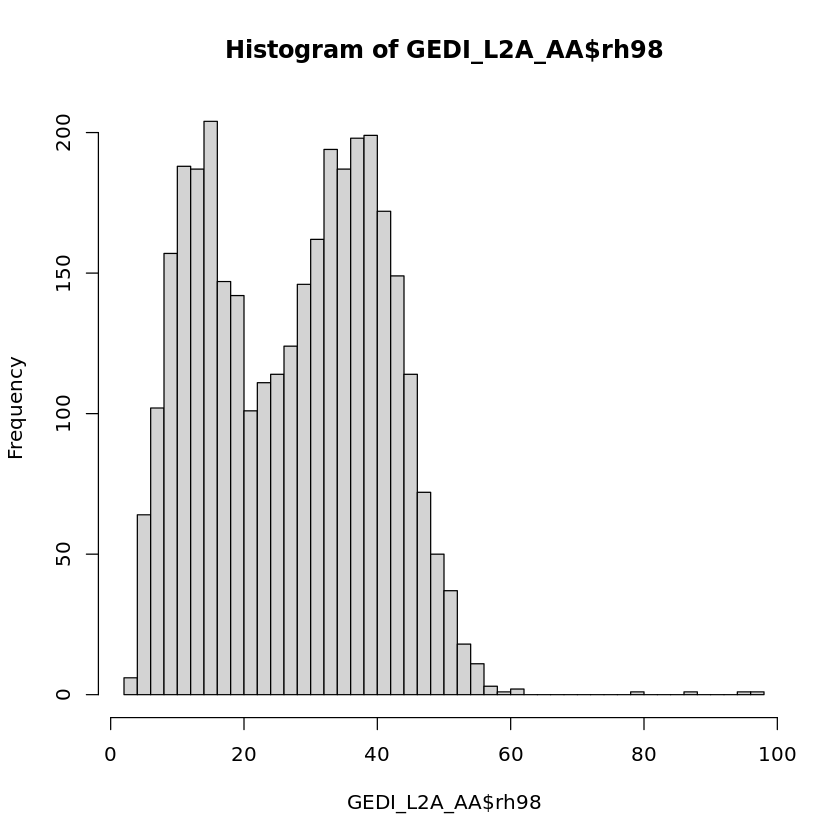

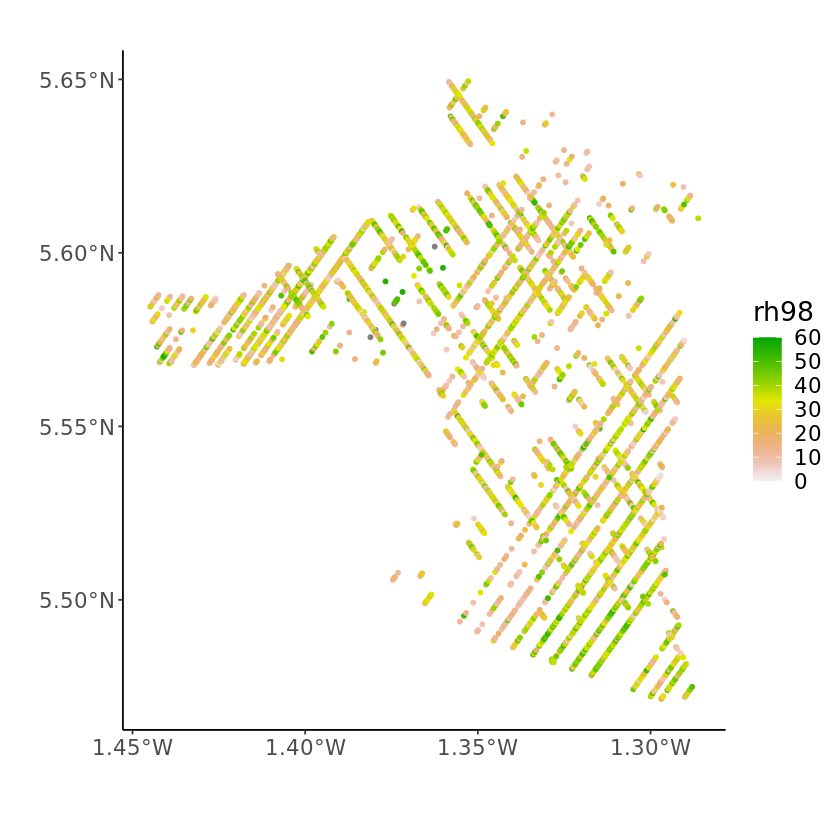

In [74]:
hist(GEDI_L2A_AA$rh98,breaks=50)
ggplot(GEDI_L2A_AA) + coord_sf(crs = 4326) + 
     geom_point(aes(x = lon, y = lat, col=rh98), size = 1) + # make a map to see plot locations and the predicted AGBD values at each location
     scale_colour_gradientn(colours = terrain.colors(10,rev=TRUE),limits=c(0,60)) + xlab("") + ylab("") + theme(text = element_text(size = 16),plot.title = element_text(color="red", size=12, face="bold.italic"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line = element_line(colour = "black"))

In [69]:
GEDI_L4A <- read.csv('/projects/shared-buckets/leitoldv/gedi_subsetting_GHANA/DATA/GHA_L4A_predict_Af_coarse_fit_Af_sqrt_sqrt_Snowdon_1.csv')
colnames(GEDI_L4A)
GEDI_L4A <- (st_as_sf(na.omit(GEDI_L4A),coords = c(3:4),crs = st_crs(4326)))
GEDI_L4A_AA <- st_intersection(GEDI_L4A, NPA_AA)
GEDI_L4A_AA['lon'] <- st_coordinates(GEDI_L4A_AA)[,1]
GEDI_L4A_AA['lat'] <- st_coordinates(GEDI_L4A_AA)[,2]

Warning message:
“attribute variables are assumed to be spatially constant throughout all geometries”


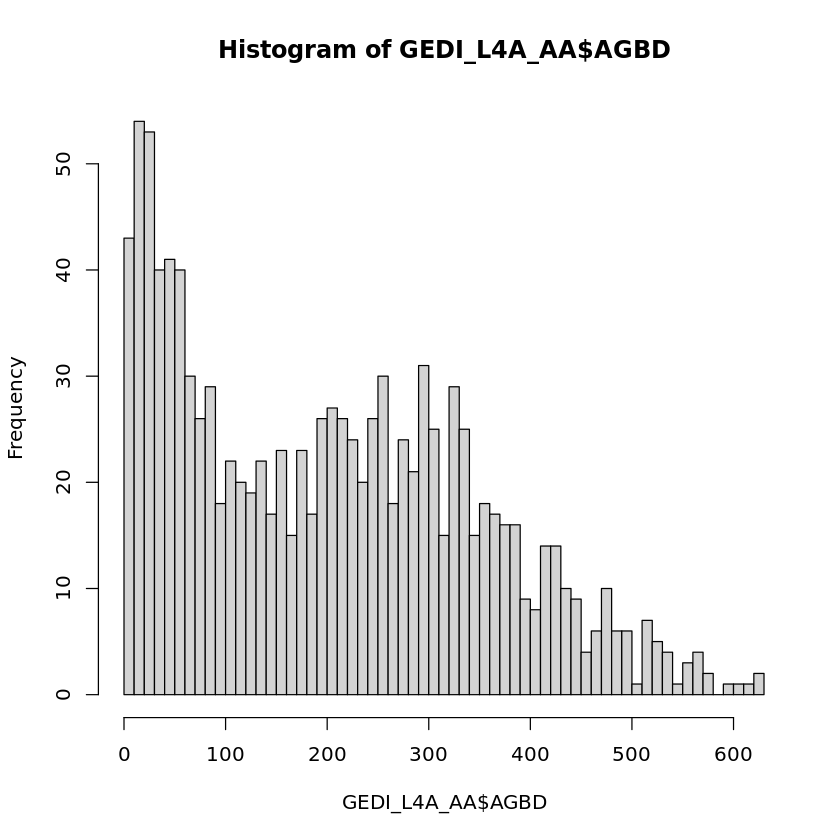

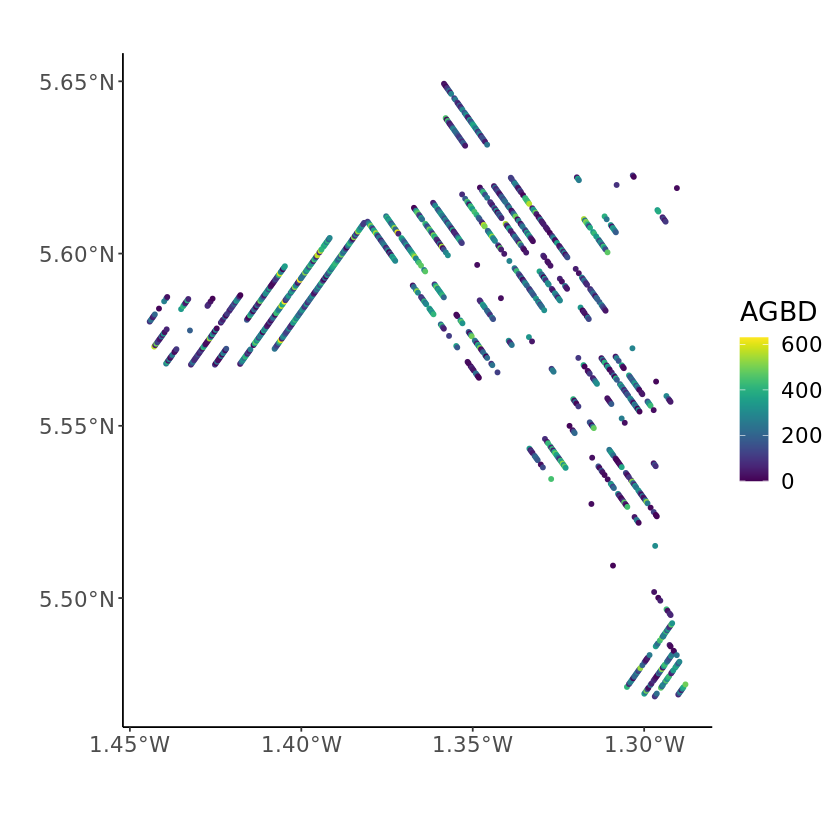

In [75]:
hist(GEDI_L4A_AA$AGBD,breaks=50)
ggplot(GEDI_L4A_AA) + coord_sf(crs = 4326) + 
     geom_point(aes(x = lon, y = lat, col=AGBD), size = 1) + # make a map to see plot locations and the predicted AGBD values at each location
     scale_colour_viridis(limits=c(0,630)) + xlab("") + ylab("") + theme(text = element_text(size = 16),plot.title = element_text(color="red", size=12, face="bold.italic"),panel.grid.major = element_blank(), panel.grid.minor = element_blank(),panel.background = element_blank(), axis.line = element_line(colour = "black"))